<a href="https://colab.research.google.com/github/pmukeshreddy/hands-on-machine-leaning-book-projects/blob/main/normal_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as n
x = 2*n.random.rand(100,1)
y = 4 + 3*x + n.random.randn(100,1)


In [ ]:
x_b = n.c_[n.ones((100,1)),x]
theta_beta = n.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_beta


array([[3.85192331],
       [3.11272558]])

In [ ]:
x_new=n.array([[0],[1]])
x_new_b=n.c_[n.ones((2,1)),x_new]
x_new_b
y_pre=x_new_b.dot(theta_beta)
y_pre

array([[3.85192331],
       [6.96464889]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


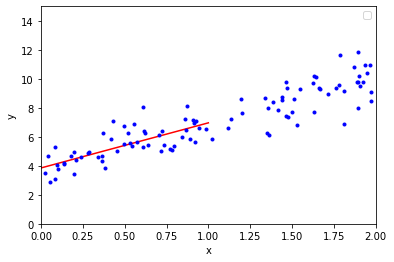

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_new,y_pre,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
lin_reg.predict(x_new)

[3.85192331]
[[3.11272558]]


array([[3.85192331],
       [6.96464889]])

In [ ]:
theta_beta_svd,residuals,rank,s = n.linalg.lstsq(x_b,y,rcond=1e-6)
theta_beta_svd

array([[3.85192331],
       [3.11272558]])

In [ ]:
n.linalg.pinv(x_b).dot(y)

array([[3.85192331],
       [3.11272558]])

In [ ]:
n.linalg.svd(x)

(array([[ 8.11326997e-03, -4.46831123e-02, -1.14507580e-01, ...,
         -5.15077319e-02, -1.68392546e-02, -1.21093713e-01],
        [ 4.46831123e-02,  9.98019488e-01, -5.07537716e-03, ...,
         -2.28300315e-03, -7.46374765e-04, -5.36729766e-03],
        [ 1.14507580e-01, -5.07537716e-03,  9.86993539e-01, ...,
         -5.85055858e-03, -1.91270401e-03, -1.37545537e-02],
        ...,
        [ 5.15077319e-02, -2.28300315e-03, -5.85055858e-03, ...,
          9.97368305e-01, -8.60371386e-04, -6.18706520e-03],
        [ 1.68392546e-02, -7.46374765e-04, -1.91270401e-03, ...,
         -8.60371386e-04,  9.99718722e-01, -2.02271702e-03],
        [ 1.21093713e-01, -5.36729766e-03, -1.37545537e-02, ...,
         -6.18706520e-03, -2.02271702e-03,  9.85454326e-01]]),
 array([11.88897618]),
 array([[1.]]))

In [ ]:
eta = 0.1
nof_itterations = 1000
m = 100
theta = n.random.randn(2, 1)
for itteration in range(nof_itterations):
    gradient = 2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta = theta-eta*gradient
theta


array([[3.85192331],
       [3.11272558]])

In [ ]:
n_epochs=70
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta_sgd=n.random.randn(2,1)
for epochs in range(n_epochs):
    for i in range(m):
        random_index=n.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient_sgd=2*xi.T.dot(xi.dot(theta_sgd)-yi)
        eta=learning_schedule(m*epochs+i)
        theta_sgd=theta_sgd-eta*gradient_sgd

array([[ 7.08259557],
       [-0.19962315]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sdg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sdg.fit(x,y.ravel())
sdg.intercept_

array([4.0076196])

In [ ]:
sdg.coef_

array([3.14191696])